In [33]:
# Twitter Sentiment Analysis on SPY using VADER

In [34]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# consumer_key = "dFhoMiB8aIYaBqry5OKMuVEs2"
# consumer_secret = "D5CXxn1hwatRd9bEHTJkRAOoFowGyeLnANmpcHW7kmn35iYM0G"
# access_token = "1542288001631506436-iaYMHTYTSmx62ZtELOGvF2p7XFQ9ZR"
# access_token_secret= "S4spt3ODtDEHETO4wML5CChWx8rAwkj5pv4fobWoV24o9"
# auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
# auth.set_access_token(access_token,access_token_secret)
# api = tweepy.API(auth, wait_on_rate_limit = True)

In [35]:
## search_words = 'stocks S&P 500'  #individually collected tweets for 5 different keywords
## tweets = tweepy.Cursor(api.search_full_archive, label="dev", query=search_words, fromDate="202201010100", toDate="202203310100", maxResults="500").items(40000)
## tweets

In [36]:
## tweet_details = [[tweet.text, tweet.user.screen_name, tweet.user.location,tweet.created_at ] for tweet in tweets]

In [37]:
# tweet_df = pd.DataFrame(data=tweet_details, columns=["text","user","location", "date" ])
#saving the dataframe into csv file
# tweet_df.to_csv ('tweets_7.csv', index = False, header=True)

In [38]:
import glob
from path import Path
#Use glob to match the pattern ‘csv’
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
df_tweets = pd.read_csv(Path('tweets_7.csv'), 
    parse_dates=True, 
    infer_datetime_format=True
)
#display the first 10 tweets
display(df_tweets.head())
display(df_tweets.tail())

,text,user,location,date
0,RT @hussmanjp: So this is fun. The share of ho...,AndreviusB,"Los Angeles, CA",2022-03-31 00:59:52+00:00
1,"RT @TeamofStockTra: Good evening, y’all. Happy...",AkramMSiddique,Washington DC,2022-03-31 00:54:36+00:00
2,"RT @LizYoungStrat: Since 1977, there have been...",wj93224929,NaN,2022-03-31 00:54:33+00:00
3,"Good evening, y’all. Happy Hump Day! 🐪\n\nStoc...",TeamofStockTra,Washington DC,2022-03-31 00:53:31+00:00
4,RT @hussmanjp: So this is fun. The share of ho...,Chazzl3dazzl3,Orange County,2022-03-31 00:47:44+00:00


,text,user,location,date
33956,RT @business: BREAKING: S&amp;P 500 gains 27% ...,StockWowso,NaN,2022-01-01 01:10:12+00:00
33957,RT @markets: BREAKING: S&amp;P 500 gains 27% i...,TeeTweetsHere,NaN,2022-01-01 01:10:05+00:00
33958,RT @business: BREAKING: S&amp;P 500 gains 27% ...,judz_h,"Sydney, New South Wales",2022-01-01 01:09:35+00:00
33959,RT @markets: BREAKING: S&amp;P 500 gains 27% i...,jpu19,Buenos Aires / Argentina,2022-01-01 01:08:32+00:00
33960,RT @MarketWatch: Fun fact: 88% of the S&amp;P ...,AtlantoCeltica,NaN,2022-01-01 01:05:59+00:00


In [39]:
df_tweets.shape

(33961, 4)

In [40]:
df_tweets.duplicated(subset=['text']).sum()
df_tweets=df_tweets.drop_duplicates(subset=['text'])
df_tweets.shape

(16814, 4)

In [41]:
import re
# function for twitter text cleaning
def tweet_cleaner(text):
    #remove RT
    text = re.sub("RT @[\w]*:","",text)
    #remove twitter handles (@user)
    text = re.sub("(@[A-Za-z0-9_]+)","", text)
    #remove url links
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    # remove whitespaces
    text = ' '.join(text.split())
    return text
#Apply text cleaning function to text column in df_tweets dataframe
df_tweets['text'] = df_tweets['text'].apply(lambda x:tweet_cleaner(x))

In [42]:
#downloading the vader lexicon from nltk
import nltk
nltk.download('vader_lexicon')
#importing sentimentintensityanaylzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\WilsonRosa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
df_tweets['scores'] = df_tweets['text'].apply(lambda text: sid.polarity_scores(text))
df_tweets.head(10)

,text,user,location,date,scores
0,So this is fun. The share of household financi...,AndreviusB,"Los Angeles, CA",2022-03-31 00:59:52+00:00,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp..."
1,"Good evening, y’all. Happy Hump Day! 🐪 Stocks ...",AkramMSiddique,Washington DC,2022-03-31 00:54:36+00:00,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp..."
2,"Since 1977, there have been eight yield curve ...",wj93224929,NaN,2022-03-31 00:54:33+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,"Good evening, y’all. Happy Hump Day! 🐪 Stocks ...",TeamofStockTra,Washington DC,2022-03-31 00:53:31+00:00,"{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'comp..."
7,US stocks continue recent rally on Tuesday as ...,ValenzuelaMayer,"Madrid, Comunidad de Madrid",2022-03-31 00:36:17+00:00,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp..."
17,📢Update on S&amp;P 500 momentum stocks 📈Stock ...,TradeInMomentum,NaN,2022-03-31 00:03:53+00:00,"{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'comp..."
18,Tesla is one of only 11 stocks in the S&amp;P ...,bungobot1,In your book,2022-03-31 00:02:07+00:00,"{'neg': 0.106, 'neu': 0.566, 'pos': 0.328, 'co..."
20,Berkshire Hathaway is up +20.01% year to date ...,TheTechTraders,NaN,2022-03-31 00:00:23+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
28,5 of the Best Canadian S&amp;P 500 ETFS to Own...,StockTrades_CA,Calgary Alberta Canada,2022-03-30 23:37:14+00:00,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp..."
31,Tesla is one of only 11 stocks in the S&amp;P ...,techpearce2,"Manchester, England",2022-03-30 23:35:05+00:00,"{'neg': 0.106, 'neu': 0.566, 'pos': 0.328, 'co..."


In [44]:
def sentimentPredict(sentiment):
    if sentiment['compound'] >= 0.6:
        return "Extremely Bullish"
    elif sentiment['compound'] >= 0.2 and sentiment['compound'] < 0.6: 
        return "Bullish"
    elif sentiment['compound'] <= -0.2 and sentiment['compound'] > -0.6: 
        return "Bearish"
    elif sentiment['compound'] <= -0.6: 
        return "Extremely Bearish"
    else:
        return "Neutral"

final_df = df_tweets
final_df['label'] = df_tweets['scores'].apply(lambda x: sentimentPredict(x))

display(final_df.head())
display(final_df.tail())

,text,user,location,date,scores,label
0,So this is fun. The share of household financi...,AndreviusB,"Los Angeles, CA",2022-03-31 00:59:52+00:00,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",Extremely Bullish
1,"Good evening, y’all. Happy Hump Day! 🐪 Stocks ...",AkramMSiddique,Washington DC,2022-03-31 00:54:36+00:00,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",Extremely Bullish
2,"Since 1977, there have been eight yield curve ...",wj93224929,NaN,2022-03-31 00:54:33+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,"Good evening, y’all. Happy Hump Day! 🐪 Stocks ...",TeamofStockTra,Washington DC,2022-03-31 00:53:31+00:00,"{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'comp...",Extremely Bullish
7,US stocks continue recent rally on Tuesday as ...,ValenzuelaMayer,"Madrid, Comunidad de Madrid",2022-03-31 00:36:17+00:00,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...",Bullish


,text,user,location,date,scores,label
33938,U.S. airline stocks vs 27% gain in the S&amp;P...,luisevanegas,BOG/SKBO,2022-01-01 01:59:06+00:00,"{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp...",Extremely Bullish
33940,The S&amp;P 500 notched 70 all-time highs in 2...,MarketPictorial,The other side of the pond.,2022-01-01 01:52:00+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
33943,The American S&amp;P 500 stocks were up 28% in...,chris_in_cal,"Oakland, CA",2022-01-01 01:43:38+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
33951,US stocks: Wall Street joins global slump for ...,rulersworldmag,"Ibada, Nigeria",2022-01-01 01:24:03+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
33960,Fun fact: 88% of the S&amp;P 500 showed positi...,AtlantoCeltica,NaN,2022-01-01 01:05:59+00:00,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...",Extremely Bullish


In [45]:
# https://prastuti.medium.com/twitter-sentiment-analysis-on-covid-19-using-vader-82f030b686a9

C:\Users\WilsonRosa\anaconda3\envs\dev\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

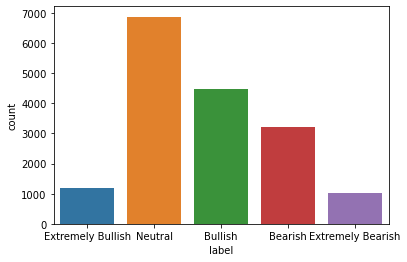

In [46]:
import seaborn as sns
sns.countplot(final_df['label'], label='count')

In [47]:
Extremely_Bullish = final_df[final_df['label']== 'Extremely Bullish']
Bullish = final_df[final_df['label']== 'Bullish']
Bearish = final_df[final_df['label']== 'Bearish']
Extremely_Bearish = final_df[final_df['label']== 'Extremely Bearish']
Neutral  = final_df[final_df['label']=='Neutral']

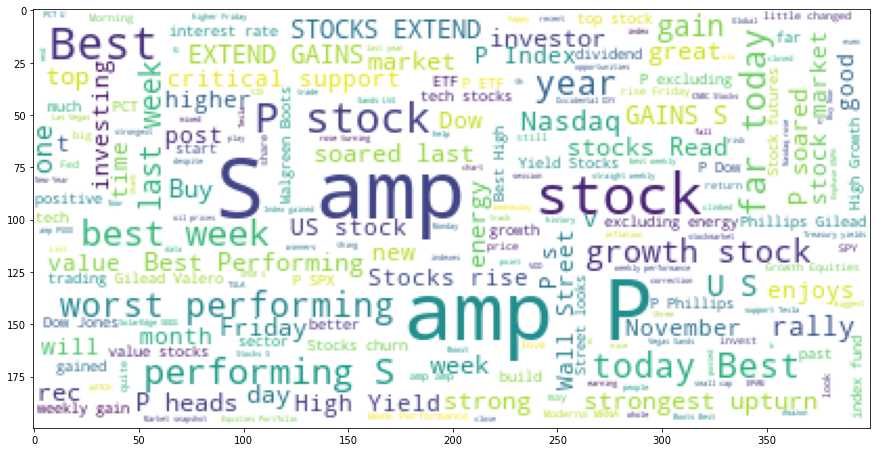

In [48]:
# for extremely bullish tweets
bull_sentences = Extremely_Bullish['text'].tolist()
bull_sentences_as_one_string = " ".join(bull_sentences)
plt.figure(figsize = (15,15))
wordcloud = WordCloud(background_color='white',max_font_size = 40).generate(bull_sentences_as_one_string)
plt.imshow(wordcloud)

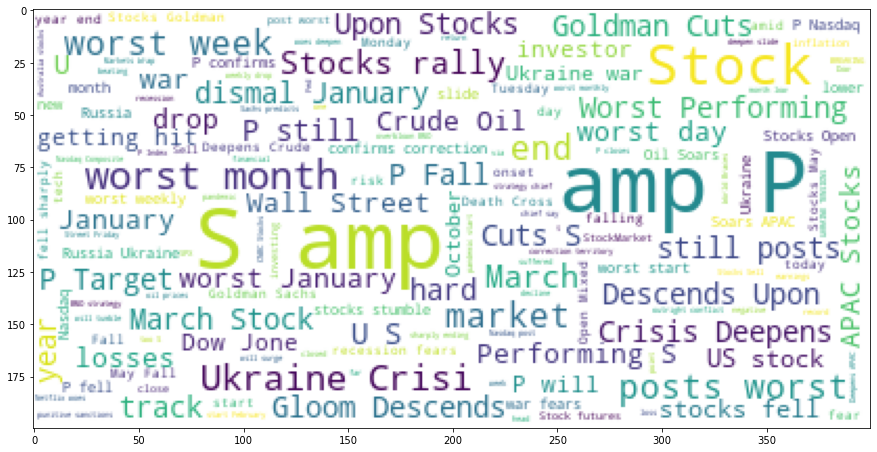

In [49]:
#for extremely bearish tweets
bear_sentences = Extremely_Bearish['text'].tolist()
bear_sentences_as_one_string = " ".join(bear_sentences)
plt.figure(figsize = (15,15))
wordcloud = WordCloud(background_color='white',max_font_size = 40).generate(bear_sentences_as_one_string)
plt.imshow(wordcloud)

In [50]:
def sentimentPredict(sentiment):
    if sentiment['compound'] >= 0.0:
        return sentiment['compound']
    else:
        return sentiment['compound']

final_df_score = df_tweets
final_df_score['compound score'] = df_tweets['scores'].apply(lambda x: sentimentPredict(x))

display(final_df_score.head())
display(final_df_score.tail())

,text,user,location,date,scores,label,compound score
0,So this is fun. The share of household financi...,AndreviusB,"Los Angeles, CA",2022-03-31 00:59:52+00:00,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",Extremely Bullish,0.7553
1,"Good evening, y’all. Happy Hump Day! 🐪 Stocks ...",AkramMSiddique,Washington DC,2022-03-31 00:54:36+00:00,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",Extremely Bullish,0.7840
2,"Since 1977, there have been eight yield curve ...",wj93224929,NaN,2022-03-31 00:54:33+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000
3,"Good evening, y’all. Happy Hump Day! 🐪 Stocks ...",TeamofStockTra,Washington DC,2022-03-31 00:53:31+00:00,"{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'comp...",Extremely Bullish,0.7840
7,US stocks continue recent rally on Tuesday as ...,ValenzuelaMayer,"Madrid, Comunidad de Madrid",2022-03-31 00:36:17+00:00,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...",Bullish,0.3400


,text,user,location,date,scores,label,compound score
33938,U.S. airline stocks vs 27% gain in the S&amp;P...,luisevanegas,BOG/SKBO,2022-01-01 01:59:06+00:00,"{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp...",Extremely Bullish,0.7351
33940,The S&amp;P 500 notched 70 all-time highs in 2...,MarketPictorial,The other side of the pond.,2022-01-01 01:52:00+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000
33943,The American S&amp;P 500 stocks were up 28% in...,chris_in_cal,"Oakland, CA",2022-01-01 01:43:38+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000
33951,US stocks: Wall Street joins global slump for ...,rulersworldmag,"Ibada, Nigeria",2022-01-01 01:24:03+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000
33960,Fun fact: 88% of the S&amp;P 500 showed positi...,AtlantoCeltica,NaN,2022-01-01 01:05:59+00:00,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...",Extremely Bullish,0.8271


In [86]:
final_df_score['compound score'].mean()

0.0431694421315566

In [87]:
final_df_score['compound score'].median()

0.0

In [88]:
final_df_score['date'] = pd.to_datetime(final_df_score['date'])
final_df_score['new_date_column'] = final_df_score['date'].dt.date
display(final_df_score.head())
display(final_df_score.tail())

,text,user,location,date,scores,label,compound score,new_date_column
0,So this is fun. The share of household financi...,AndreviusB,"Los Angeles, CA",2022-03-31 00:59:52+00:00,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",Extremely Bullish,0.7553,2022-03-31
1,"Good evening, y’all. Happy Hump Day! 🐪 Stocks ...",AkramMSiddique,Washington DC,2022-03-31 00:54:36+00:00,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",Extremely Bullish,0.7840,2022-03-31
2,"Since 1977, there have been eight yield curve ...",wj93224929,NaN,2022-03-31 00:54:33+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000,2022-03-31
3,"Good evening, y’all. Happy Hump Day! 🐪 Stocks ...",TeamofStockTra,Washington DC,2022-03-31 00:53:31+00:00,"{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'comp...",Extremely Bullish,0.7840,2022-03-31
7,US stocks continue recent rally on Tuesday as ...,ValenzuelaMayer,"Madrid, Comunidad de Madrid",2022-03-31 00:36:17+00:00,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...",Bullish,0.3400,2022-03-31


,text,user,location,date,scores,label,compound score,new_date_column
33938,U.S. airline stocks vs 27% gain in the S&amp;P...,luisevanegas,BOG/SKBO,2022-01-01 01:59:06+00:00,"{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp...",Extremely Bullish,0.7351,2022-01-01
33940,The S&amp;P 500 notched 70 all-time highs in 2...,MarketPictorial,The other side of the pond.,2022-01-01 01:52:00+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000,2022-01-01
33943,The American S&amp;P 500 stocks were up 28% in...,chris_in_cal,"Oakland, CA",2022-01-01 01:43:38+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000,2022-01-01
33951,US stocks: Wall Street joins global slump for ...,rulersworldmag,"Ibada, Nigeria",2022-01-01 01:24:03+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000,2022-01-01
33960,Fun fact: 88% of the S&amp;P 500 showed positi...,AtlantoCeltica,NaN,2022-01-01 01:05:59+00:00,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...",Extremely Bullish,0.8271,2022-01-01


In [89]:
final_df_score_dateindex = final_df_score.set_index('new_date_column')

In [90]:
display(final_df_score_dateindex.head())
display(final_df_score_dateindex.tail())

,text,user,location,date,scores,label,compound score
new_date_column,,,,,,,
2022-03-31,So this is fun. The share of household financi...,AndreviusB,"Los Angeles, CA",2022-03-31 00:59:52+00:00,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",Extremely Bullish,0.7553
2022-03-31,"Good evening, y’all. Happy Hump Day! 🐪 Stocks ...",AkramMSiddique,Washington DC,2022-03-31 00:54:36+00:00,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",Extremely Bullish,0.7840
2022-03-31,"Since 1977, there have been eight yield curve ...",wj93224929,NaN,2022-03-31 00:54:33+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000
2022-03-31,"Good evening, y’all. Happy Hump Day! 🐪 Stocks ...",TeamofStockTra,Washington DC,2022-03-31 00:53:31+00:00,"{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'comp...",Extremely Bullish,0.7840
2022-03-31,US stocks continue recent rally on Tuesday as ...,ValenzuelaMayer,"Madrid, Comunidad de Madrid",2022-03-31 00:36:17+00:00,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...",Bullish,0.3400


,text,user,location,date,scores,label,compound score
new_date_column,,,,,,,
2022-01-01,U.S. airline stocks vs 27% gain in the S&amp;P...,luisevanegas,BOG/SKBO,2022-01-01 01:59:06+00:00,"{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp...",Extremely Bullish,0.7351
2022-01-01,The S&amp;P 500 notched 70 all-time highs in 2...,MarketPictorial,The other side of the pond.,2022-01-01 01:52:00+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000
2022-01-01,The American S&amp;P 500 stocks were up 28% in...,chris_in_cal,"Oakland, CA",2022-01-01 01:43:38+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000
2022-01-01,US stocks: Wall Street joins global slump for ...,rulersworldmag,"Ibada, Nigeria",2022-01-01 01:24:03+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000
2022-01-01,Fun fact: 88% of the S&amp;P 500 showed positi...,AtlantoCeltica,NaN,2022-01-01 01:05:59+00:00,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...",Extremely Bullish,0.8271


In [91]:
final_df_score_dateindex.to_csv('final_df_score_dateindex.csv')

In [92]:
final_df_score_dateindex_edited = pd.read_csv(Path('final_df_score_dateindex_edited.csv'), 
    parse_dates=True, 
)

final_df_score_dateindex_edited['new_date_column'] = pd.to_datetime(final_df_score_dateindex_edited['new_date_column'])
final_df_score_dateindex_edited = final_df_score_dateindex_edited.set_index('new_date_column')

#display the first 10 tweets
display(final_df_score_dateindex_edited.head())
display(final_df_score_dateindex_edited.tail())

,average compound score per date
new_date_column,
2022-01-01,0.082169
2022-01-02,0.261126
2022-01-03,0.196649
2022-01-04,0.120354
2022-01-05,0.134196


,average compound score per date
new_date_column,
2022-03-27,0.120587
2022-03-28,0.162423
2022-03-29,0.307204
2022-03-30,0.159647
2022-03-31,0.441675


In [93]:
import numpy as np
conditions = [
    (final_df_score_dateindex_edited['average compound score per date'] >= 0.6),
    (final_df_score_dateindex_edited['average compound score per date'] >= 0.2) & (final_df_score_dateindex_edited['average compound score per date'] < 0.6),
    (final_df_score_dateindex_edited['average compound score per date'] < 0.2) & (final_df_score_dateindex_edited['average compound score per date'] > -0.2),
    (final_df_score_dateindex_edited['average compound score per date'] <= -0.2) & (final_df_score_dateindex_edited['average compound score per date'] > -0.6),
    (final_df_score_dateindex_edited['average compound score per date'] <= -0.6)
]

values_1 = ['Extremely Bullish', 'Bullish', 'Neutral', 'Bearish', 'Extremely Bearish']
values_2 = ['2', '1', '0', '1', '2']

final_df_score_dateindex_edited['Sentiment Indicator'] = np.select(conditions, values_1)
final_df_score_dateindex_edited['Sentiment Indicator Numerical'] = np.select(conditions, values_2)

final_df_score_dateindex_edited

,average compound score per date,Sentiment Indicator,Sentiment Indicator Numerical
new_date_column,,,
2022-01-01,0.082169,Neutral,0
2022-01-02,0.261126,Bullish,1
2022-01-03,0.196649,Neutral,0
2022-01-04,0.120354,Neutral,0
2022-01-05,0.134196,Neutral,0
...,...,...,...
2022-03-27,0.120587,Neutral,0
2022-03-28,0.162423,Neutral,0
2022-03-29,0.307204,Bullish,1


<AxesSubplot:xlabel='new_date_column'>

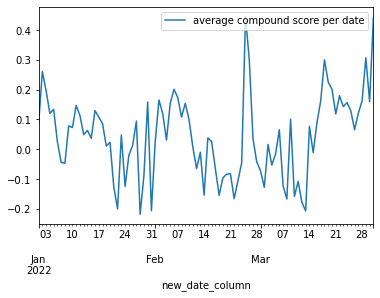

In [95]:
final_df_score_dateindex_edited.plot()